In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

sns.set_theme()
sns.set_context("paper", font_scale=1.5)
sns.set_style('ticks', {'font.family': 'Times New Roman'})

In [2]:
visir = pd.read_csv('../Data/VISIR_merged_fluxes_TMP.csv', skipinitialspace=True, na_values=['#NAME?'])

## Missing Map

__http://research.shca.ed.ac.uk/past-by-numbers/2017/04/21/identifying-gaps-in-your-data/__

<AxesSubplot:>

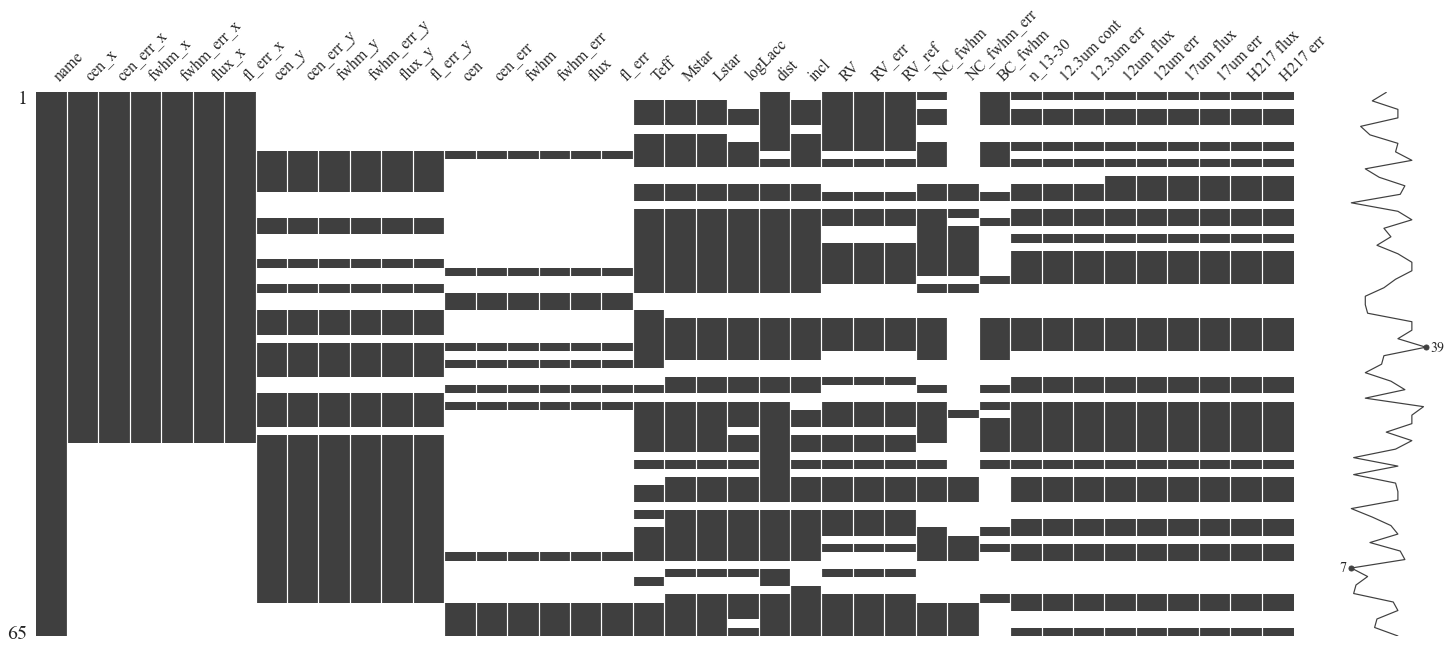

In [3]:
msno.matrix(visir)

## Nullity Correlation Matrix

nullity correlation: how strongly the presence or absence of one variable affects the presence of another

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization—in this case for instance the datetime and injury number columns, which are completely filled, are not included.

Entries marked <1 or >-1 have a correlation that is close to being exactingly negative or positive, but is still not quite perfectly so. This points to a small number of records in the dataset which are erroneous. For example, in this dataset the correlation between VEHICLE CODE TYPE 3 and CONTRIBUTING FACTOR VEHICLE 3 is <1, indicating that, contrary to our expectation, there are a few records which have one or the other, but not both. These cases will require special attention.

The heatmap works great for picking out data completeness relationships between variable pairs, but its explanatory power is limited when it comes to larger relationships and it has no particular support for extremely large datasets.

<AxesSubplot:>

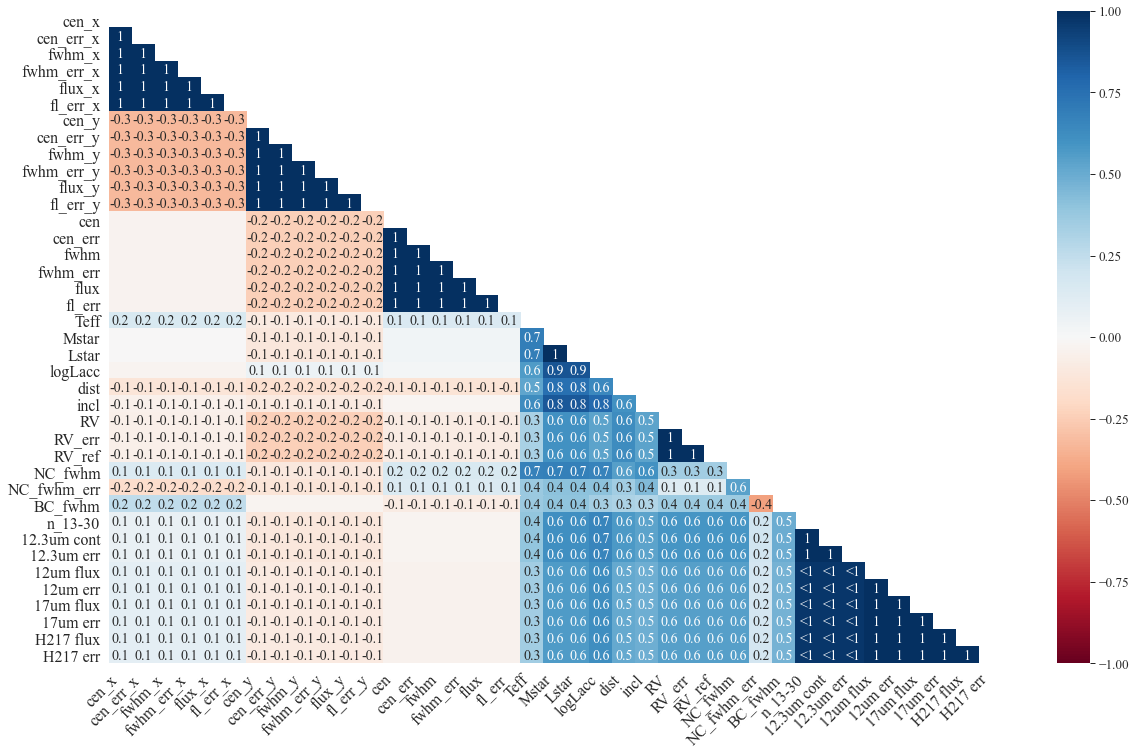

In [4]:
msno.heatmap(visir)

## Dendrogram

The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly. If your own interpretation of the dataset is that these columns actually are or ought to be match each other in nullity (for example, as CONTRIBUTING FACTOR VEHICLE 2 and VEHICLE TYPE CODE 2 ought to), then the height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filed—that is, how many values you would have to fill in or drop, if you are so inclined.

<AxesSubplot:>

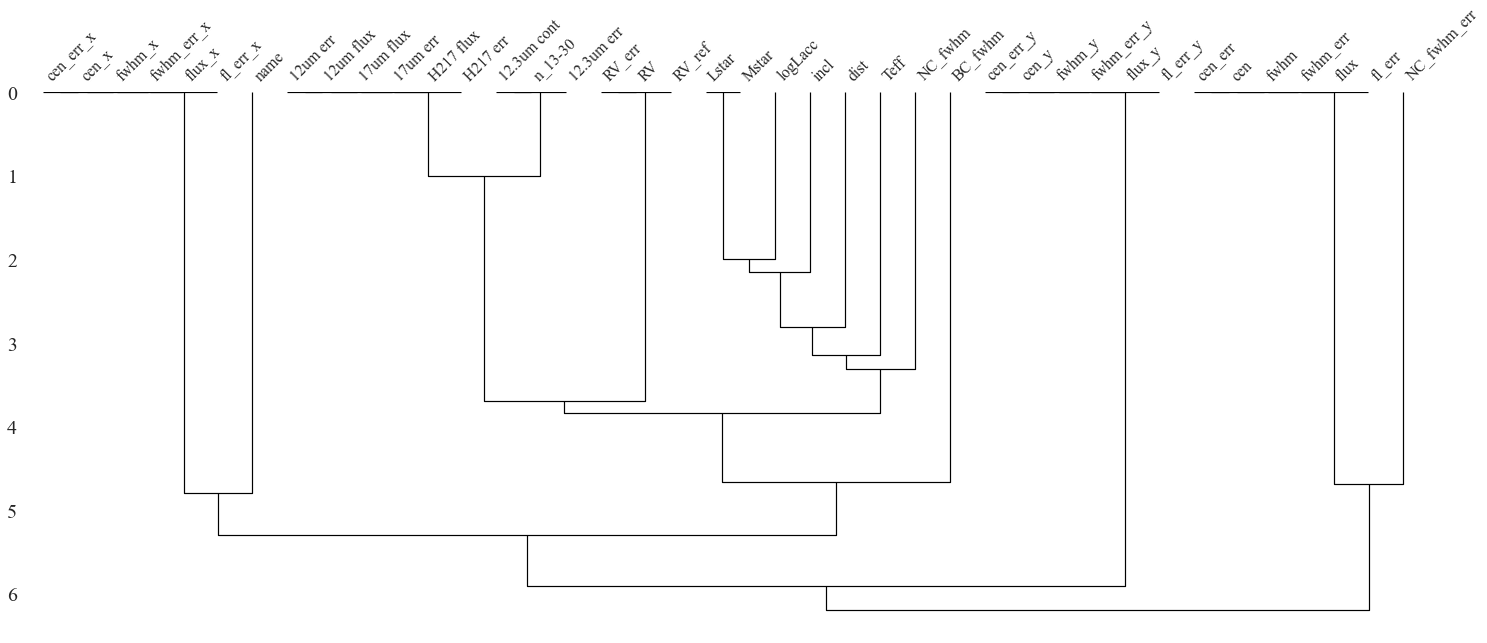

In [5]:
msno.dendrogram(visir)